**AutoRec Project - Datasets Exploration**

# Imports

In [1]:
%matplotlib inline

In [2]:
from google.colab import drive
import os

import sys
import requests
import zipfile
import copy
import shutil

import pandas as pd
import numpy as np
import random
import math

from matplotlib import pyplot as plt

In [3]:
np.random.seed(123)
random.seed(123)

In [4]:
!git clone https://github.com/aviadar/RecSys_AutoRecProject proj

Cloning into 'proj'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 45 (delta 13), reused 33 (delta 8), pack-reused 0
Unpacking objects: 100% (45/45), done.


# MovieLens 1M Dataset

## Data Loading

In [5]:
url = 'http://files.grouplens.org/datasets/movielens/ml-1m.zip'
zip_name = 'ml-1m.zip'
data_dir = 'ml-1m/'

r = requests.get(url, allow_redirects=True)
open(zip_name, 'wb').write(r.content)

with zipfile.ZipFile(zip_name,"r") as zip_ref:
    zip_ref.extractall()

In [6]:
ratings_df = pd.read_csv('/content/ml-1m/ratings.dat', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'], delimiter='::')
ratings_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,user_id,item_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
ml_users_num, ml_items_num = ratings_df.user_id.nunique(), ratings_df.item_id.nunique()
# ml_users_num, ml_items_num
print('user num: {}, items num: {}'.format(ml_users_num, ml_items_num))

user num: 6040, items num: 3706


checking for nulls and duplicates:

In [22]:
sum(ratings_df.isnull().any()), sum(ratings_df.duplicated(['item_id','user_id']))

(0, 0)

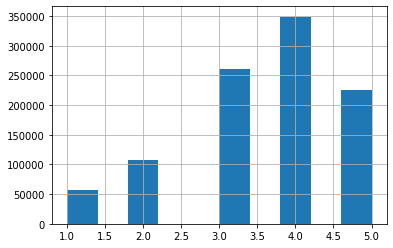

In [13]:
ratings_df['rating'].hist()

users with most ratings:

In [12]:
ratings_df['user_id'].value_counts().nlargest(n=10)

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
889     1518
3618    1344
2063    1323
1150    1302
1015    1286
Name: user_id, dtype: int64

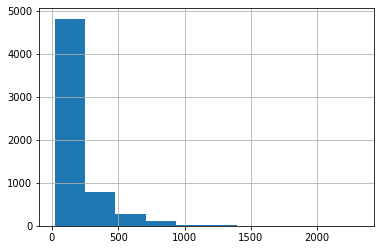

In [14]:
ratings_df['user_id'].value_counts().hist()

most users (around 4900) with up to 250 reviews

In [16]:
ratings_df['item_id'].value_counts().nlargest(n=10)

2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
Name: item_id, dtype: int64

item 2858 gets the most reviews

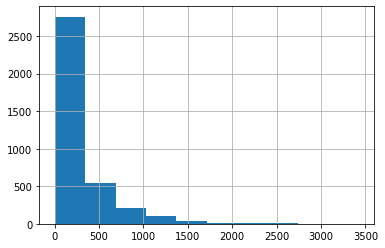

In [17]:
ratings_df['item_id'].value_counts().hist()

In [50]:
data_sparsiry =  1-(ratings_df.shape[0]/(ml_users_num*ml_items_num))
print('data_sparsiry: {}'.format(data_sparsiry))

data_sparsiry: 0.9553163743776871


# Netflix Prize Dataset

## Data Loading

In [18]:
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
with zipfile.ZipFile('/content/drive/MyDrive/rec_sys/datasets/netflix_prize.zip',"r") as zip_ref:
    zip_ref.extractall()

note that we are loading only part of the dataset because of RAM issues.

In [20]:
if not os.path.isfile('netflix_data.csv'):
    netflix_data = open('netflix_data.csv', mode='w')    
    row = list()
    files=['/content/combined_data_1.txt']
    #,'/content/combined_data_2.txt']#, 
#            '/content/combined_data_3.txt', '/content/combined_data_4.txt']
    for file in files:
        with open(file) as f:
            for line in f: 
                del row[:]
                line = line.strip()
                if line.endswith(':'):
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    netflix_data.write(','.join(row))
                    netflix_data.write('\n')
    netflix_data.close()

In [21]:
netflix_df = pd.read_csv('netflix_data.csv', sep=',', names=['item_id', 'user_id','rating','date'])
# netflix_df.date = pd.to_datetime(netflix_df.date)
netflix_df.drop(columns=['date'], inplace=True)
# netflix_df = netflix_df.sample(frac = 1)
netflix_df = netflix_df.sort_values(by=['user_id'])
netflix_df = netflix_df.iloc[:int(1.5e6)]
netflix_df.head()

,item_id,user_id,rating
881625,197,6,3
1438379,299,6,3
2547216,468,6,3
17387129,3333,6,4
1368432,295,6,4


In [23]:
netflix_df.shape

(1500000, 3)

checking for null values:

In [24]:
sum(netflix_df.isnull().any())

0

checking for duplicates:

In [25]:
sum(netflix_df.duplicated(['item_id','user_id']))

0

In [26]:
netflix_users_num = netflix_df.user_id.nunique()
netflix_items_num = netflix_df.item_id.nunique()
print('users num: {}, items num: {}'.format(netflix_users_num, netflix_items_num))

users num: 29619, items num: 4497


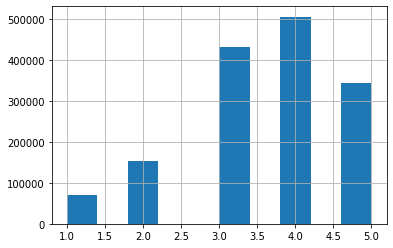

In [27]:
netflix_df['rating'].hist()

In [28]:
netflix_df['user_id'].value_counts().nlargest(n=10)

16272     1474
57633     1400
3321      1062
147386     932
71594      926
74441      910
166041     842
157667     828
121182     821
49890      818
Name: user_id, dtype: int64

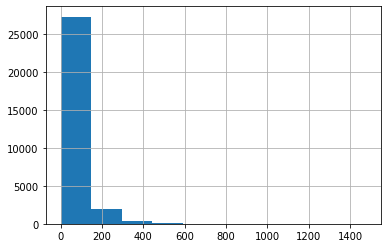

In [29]:
netflix_df['user_id'].value_counts().hist()

almost all users have less than 150 reviews

In [30]:
netflix_df['item_id'].value_counts().nlargest(n=10)

1905    12232
2152    10256
3860    10108
4432     9786
571      9748
3938     9594
4306     9554
2452     9411
1962     9092
3624     8907
Name: item_id, dtype: int64

most rated item (1905) has over 12232

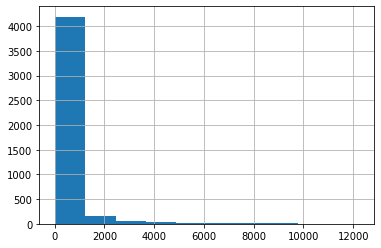

In [31]:
netflix_df['item_id'].value_counts().hist()

In [51]:
data_sparsiry =  1-(netflix_df.shape[0]/(netflix_users_num*netflix_items_num))
print('data_sparsiry: {}'.format(data_sparsiry))

data_sparsiry: 0.988738454917366
